In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## 📊 Dataset

The dataset used is the Boston Housing Dataset, a well-known dataset used for regression tasks. It contains a variety of features describing housing conditions and socioeconomic factors. The goal is to predict housing prices based on these features.

In the dataset, some features like CRIM (crime rate) have very low values, while others like B (a demographic-based index) have consistently high values. How does this scale imbalance affect model training and, in particular, gradient descent?

In [3]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 📚 Theoretical Background: Linear Regression Optimization

To train our linear regression model, we minimize the **squared error cost function**, which measures the average squared difference between the predicted values and the true labels:

$$
\begin{aligned}
\text{Prediction:} \quad & \hat{y}^{(i)} = f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b \\
\text{Cost Function:} \quad & J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
\end{aligned}
$$

We minimize the cost function using gradient descent.

$$
\text{repeat until converge:} \left\{\begin{aligned}w_j &= w_j - \alpha \frac{\partial J(\vec{w}, b)}{\partial w_j} = w_j- \frac{\alpha}{m} \sum_{i=0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)}) x_j^{(i)} \\b &= b - \alpha \frac{\partial J(w, b)}{\partial b} = w -\frac{\alpha}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \end{aligned}\right. 
$$


In [4]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for linear regression.

    Arguments:
    X -- Input feature matrix of shape (m, n)
    y -- True output values of shape (m,)
    w -- Weights vector of shape (n,)
    b -- Bias term (scalar)

    Returns:
    cost -- The mean squared error cost (scalar)
    """
    m = X.shape[0]  # Number of training examples
    cost = 0.0

    for i in range(m):
        prediction = np.dot(X[i], w) + b
        error = prediction - y[i]
        cost += error ** 2

    cost = cost / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    """
    Computes the gradient of the mean-squared-error cost for linear regression.

    Arguments:
    X -- Input feature matrix of shape (m, n)
    y -- True output values of shape (m,)
    w -- Weights vector of shape (n,)
    b -- Bias term (scalar)

    Returns:
    dj_dw -- Gradient of the cost with respect to w (ndarray, shape (n,))
    dj_db -- Gradient of the cost with respect to b (scalar)
    """
    m, n = X.shape                  # m: number of examples, n: number of features
    dj_dw = np.zeros(n)             
    dj_db = 0.0                     

    for i in range(m):
        error = np.dot(X[i], w) + b - y[i]  
        dj_dw += error * X[i]               
        dj_db += error                      

    dj_dw /= m                              
    dj_db /= m

    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to optimize the cost function.

    Arguments:
    X -- Input feature matrix of shape (m, n)
    y -- True output values of shape (m,)
    w_in -- Initial weights vector of shape (n,)
    b_in -- Initial bias term (scalar)
    cost_function -- Function to compute the cost
    gradient_function -- Function to compute gradients
    alpha -- Learning rate (float)
    num_iters -- Number of iterations (int)

    Returns:
    w -- Optimized weights (ndarray of shape (n,))
    b -- Optimized bias (scalar)
    J_history -- List of cost values per iteration (for plotting)
    """
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:  # Avoid excessive memory usage
            cost = cost_function(X, y, w, b)
            J_history.append(cost)

    return w, b, J_history

### 📚 Theoretical Background: Feature Scaling Techniques

Feature scaling transforms input features to comparable ranges. Below are three common techniques:

#### Min-Max Scaling

Scales the feature to a fixed range, typically [0, 1]:

$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

#### Mean Normalization

Centers the feature around 0 by subtracting the mean and scaling by the range:

$$
x_{\text{scaled}} = \frac{x - \mu}{x_{\max} - x_{\min}}
$$

#### Z-Score Standardization

Also known as **Standard Scaling**, this method uses the mean and standard deviation:

$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$


In [5]:
def min_max_scaling(X):
    """
    Scales each feature to the range [0, 1].
    X: NumPy array of shape (m, n)
    """
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

def mean_normalization(X):
    """
    Centers data to mean 0 and scales by range (max - min).
    X: NumPy array of shape (m, n)
    """
    X_mean = X.mean(axis=0)
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_mean) / (X_max - X_min)

def z_score_standardization(X):
    """
    Standardizes each feature to mean 0 and std 1.
    X: NumPy array of shape (m, n)
    """
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X - X_mean) / X_std

### 🔍 Comparing the Effect of Feature Scaling on the Cost Function

A **contour plot** is a two-dimensional visualization that shows how a function (like a cost function) changes over two input variables. It uses **contour lines** to connect points that have the same value. In the context of linear regression each point on the plot represents a pair of equal costs.


The **contour plots** below illustrate how different feature scaling methods impact the the cost function in linear regression. 

- **Original (Unscaled)**  
  The cost function contours are highly stretched and distorted. This is caused by the large difference in scale between the two features (e.g., `CRIM` is much smaller than `B`). It is very likely that the gradient descent will be overshoot, resulting in a zigzag pattern or deconvergence.

- **Min-Max Scaling**  
  The contours are more regular and aligned, but still somewhat stretched. 

- **Mean Normalization**  
  This approach centers the data and scales it using the feature range. The resulting contours are more elliptical than the Min-Max case.

- **Z-Score Standardization**  
  This method leads to the most circular and symmetric contours. Features are standardized to zero mean and unit variance, resulting in a well-conditioned cost function.

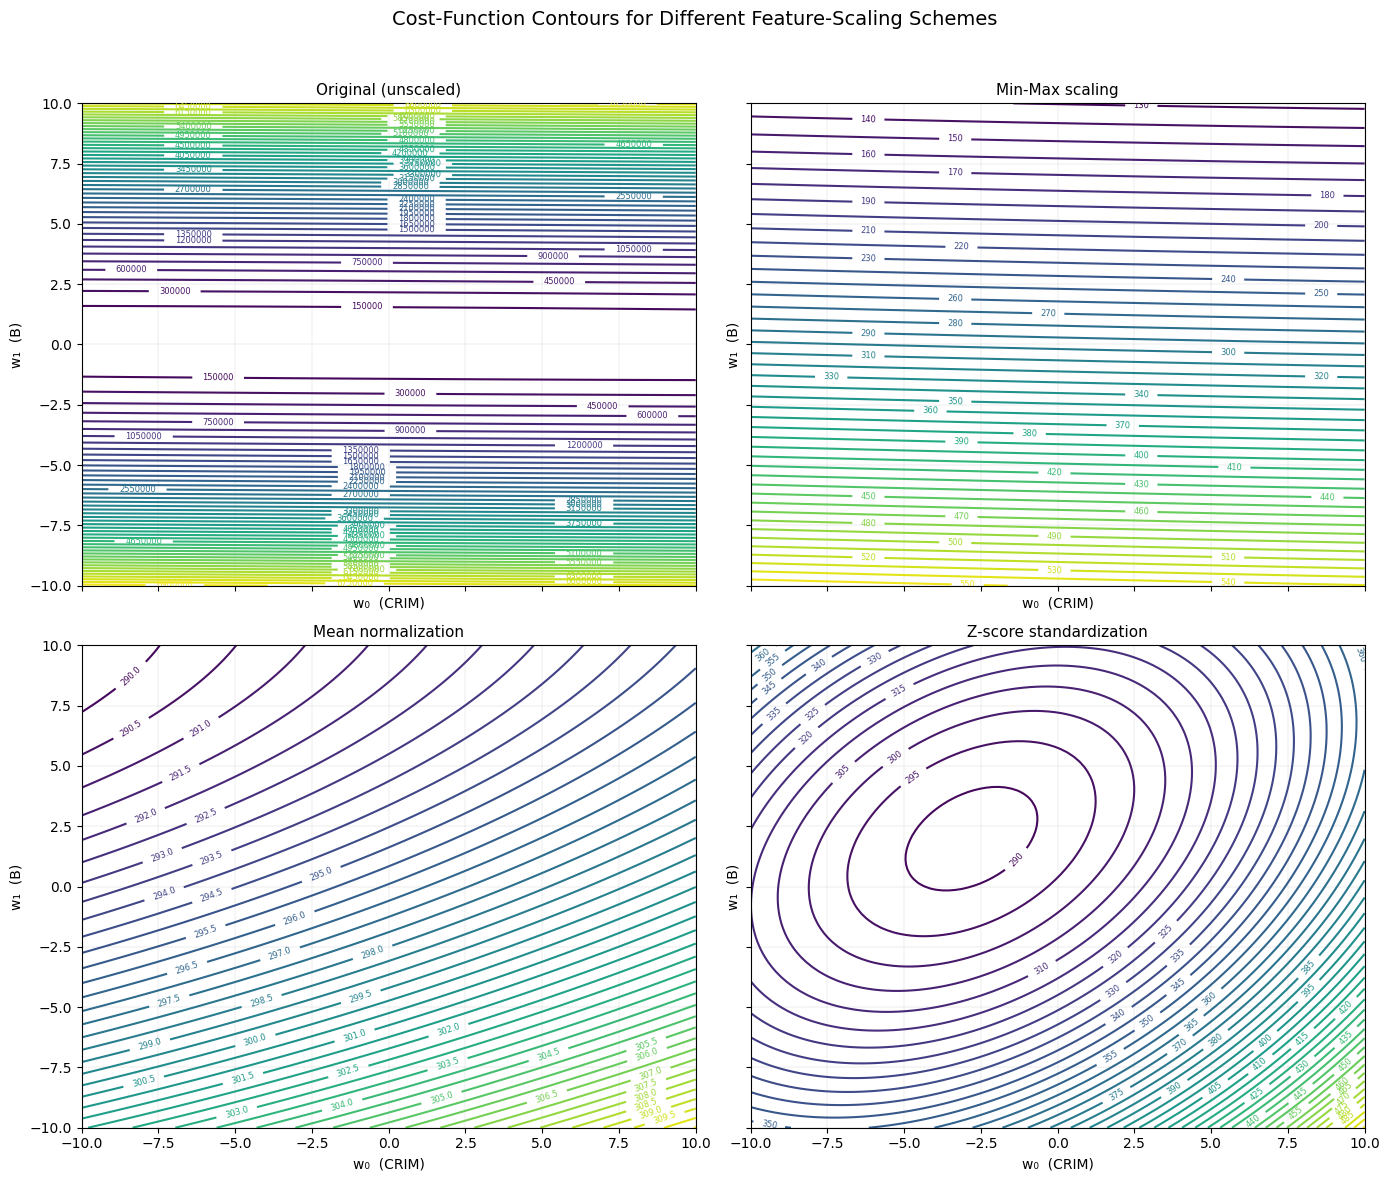

In [6]:
# --- data & cost function ---
X_orig = df[["CRIM", "B"]].values
y      = df["MEDV"].values
b      = 0                               # fixed bias

# weight grid (same for every variant; tweak if needed)
w0_range = np.linspace(-10, 10, 100)
w1_range = np.linspace(-10, 10, 100)
W0, W1   = np.meshgrid(w0_range, w1_range)

# --- helper to compute contour values on the grid ---
def cost_surface(X_scaled):
    Z = np.zeros_like(W0)
    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            w = np.array([W0[i, j], W1[i, j]])
            Z[i, j] = compute_cost(X_scaled, y, w, b)
    return Z

# --- plot all four variants ---
variants = {
    "Original (unscaled)":           X_orig,
    "Min-Max scaling":               min_max_scaling(X_orig),
    "Mean normalization":            mean_normalization(X_orig),
    "Z-score standardization":       z_score_standardization(X_orig),
}

fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True, sharey=True)

for ax, (title, X_scaled) in zip(axes.ravel(), variants.items()):
    Z = cost_surface(X_scaled)
    cp = ax.contour(W0, W1, Z, levels=50, cmap="viridis")
    ax.clabel(cp, inline=True, fontsize=6)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("w₀  (CRIM)")
    ax.set_ylabel("w₁  (B)")
    ax.grid(True, linewidth=0.3, alpha=0.5)

fig.suptitle("Cost-Function Contours for Different Feature-Scaling Schemes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 🔍 Observation: Impact of Feature Scaling on Gradient Descent Convergence

Key insights include:

Original (Unscaled)
- The **cost value explodes** to an extremely large number followed by `NaN` values. This is due to **overflow** and unstable updates, caused by vastly different feature magnitudes (e.g., `CRIM` vs. `B`). In order for the algorithm to still work, a much smaller alpha must be selected, which makes it significantly less efficient.

Min-Max Scaling
- Convergence is smooth and monotonic, indicating stable optimization.

Mean Normalization
- Convergence is smooth. Using higher learning rates is more efficient overall than Min-Max scaling.

Z-Score Standardization
- Consistently achieves the **lowest final cost** among all scaling methods.

In [52]:
alpha      = 0.01
iterations = 1_000
b_init     = 0

# --- store final cost per method ---
cost_histories = {}

for name, X_scaled in variants.items():
    w_init = np.zeros(X_scaled.shape[1])
    w_final, b_final, J_history = gradient_descent(
        X_scaled, y, w_init, b_init,
        compute_cost, compute_gradient,
        alpha, iterations
    )
    cost_histories[name] = J_history

# --- Convert to DataFrame ---
df_costs = pd.DataFrame(cost_histories)
df_costs.index.name = "Iteration"
df_sampled = df_costs.iloc[::100, :]
pd.set_option("display.float_format", "{:.4f}".format)

display(df_sampled)  

/var/folders/4y/3l045nhs31vcj3w06w12wxnm0000gn/T/ipykernel_20862/2046942329.py:20: RuntimeWarning: overflow encountered in scalar power
  cost += error ** 2
/var/folders/4y/3l045nhs31vcj3w06w12wxnm0000gn/T/ipykernel_20862/2046942329.py:45: RuntimeWarning: overflow encountered in add
  dj_dw += error * X[i]
/var/folders/4y/3l045nhs31vcj3w06w12wxnm0000gn/T/ipykernel_20862/2046942329.py:79: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw


,Original (unscaled),Min-Max scaling,Mean normalization,Z-score standardization
Iteration,,,,
0,468041937.3287,286.6899,291.0154,290.8019
100,NaN,43.8156,74.9550,68.0085
200,NaN,37.7423,45.5578,38.6728
300,NaN,37.5285,41.2130,34.7714
400,NaN,37.4615,40.2635,34.2497
500,NaN,37.3998,39.8037,34.1796
600,NaN,37.3400,39.4409,34.1702
700,NaN,37.2818,39.1191,34.1689
800,NaN,37.2251,38.8282,34.1687


In [57]:
alpha      = 1
iterations = 20
b_init     = 0

# --- store final cost per method ---
cost_histories = {}

for name, X_scaled in variants.items():
    w_init = np.zeros(X_scaled.shape[1])
    w_final, b_final, J_history = gradient_descent(
        X_scaled, y, w_init, b_init,
        compute_cost, compute_gradient,
        alpha, iterations
    )
    cost_histories[name] = J_history

# --- Convert to DataFrame ---
df_costs = pd.DataFrame(cost_histories)
df_costs.index.name = "Iteration"
df_sampled = df_costs.iloc[::4, :]
pd.set_option("display.float_format", "{:.4f}".format)

display(df_sampled)  

,Original (unscaled),Min-Max scaling,Mean normalization,Z-score standardization
Iteration,,,,
0,4687263647516.8311,216.8076,41.6103,35.3609
4,53395514449190585634772646418762893571078984407...,78.8248,39.7498,34.1692
8,60826127566160614285082293695685617815163599705...,46.7467,38.5119,34.1687
12,69290797791928111560162753968620676721069637145...,39.1750,37.6745,34.1687
16,78933426321108419220823812205614384458942941789...,37.2845,37.0958,34.1687


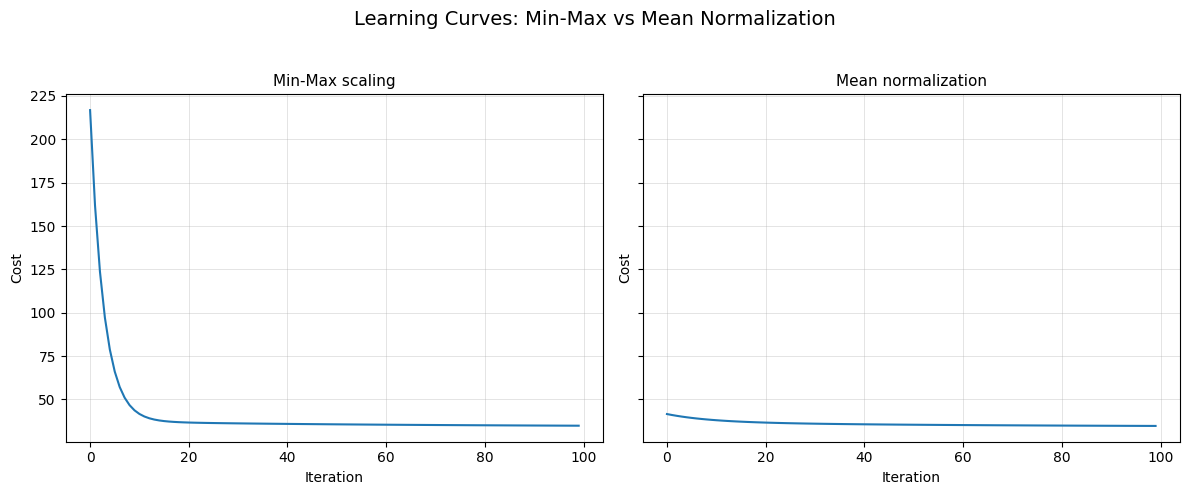

In [31]:
# --- common hyper-parameters ---
alpha      = 1
iterations = 100
b_init     = 0

# --- select only Min-Max and Mean Normalization ---
scaled_variants = {
    "Min-Max scaling":    min_max_scaling(X_orig),
    "Mean normalization": mean_normalization(X_orig),
}

# --- run gradient descent for each variant ---
histories = {}

for name, X_scaled in scaled_variants.items():
    w_init = np.zeros(X_scaled.shape[1])
    w_final, b_final, J_hist = gradient_descent(
        X_scaled, y, w_init, b_init,
        compute_cost, compute_gradient,
        alpha, iterations
    )
    histories[name] = J_hist

# --- plot learning curves ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (name, J_hist) in zip(axes, histories.items()):
    ax.plot(range(len(J_hist)), J_hist)
    ax.set_title(name, fontsize=11)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.grid(True, linewidth=0.4, alpha=0.6)

fig.suptitle("Learning Curves: Min-Max vs Mean Normalization", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

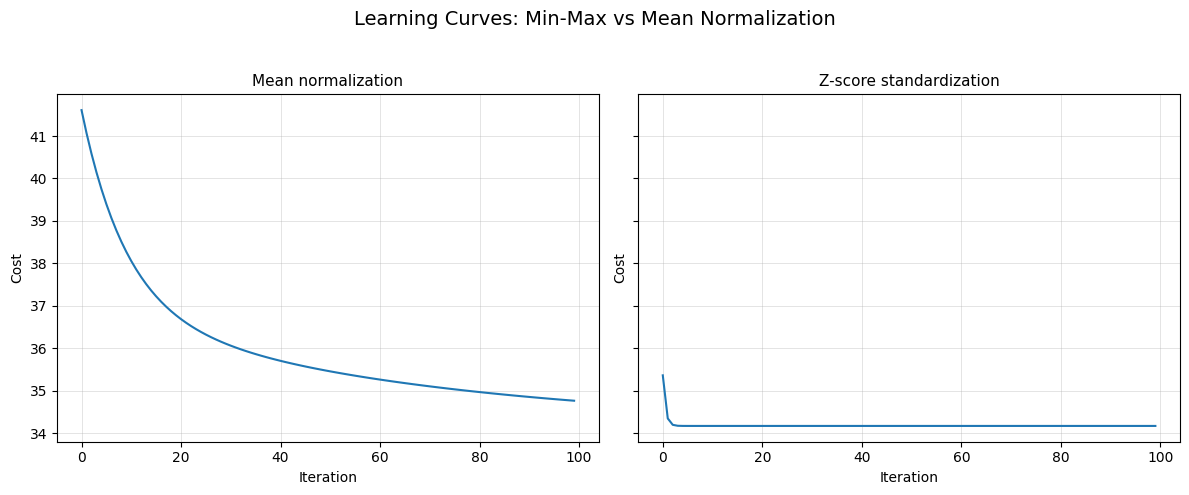

In [32]:
# --- common hyper-parameters ---
alpha      = 1
iterations = 100
b_init     = 0

# --- select only Min-Max and Mean Normalization ---
scaled_variants = {
    "Mean normalization": mean_normalization(X_orig),
    "Z-score standardization": z_score_standardization(X_orig),
}

# --- run gradient descent for each variant ---
histories = {}

for name, X_scaled in scaled_variants.items():
    w_init = np.zeros(X_scaled.shape[1])
    w_final, b_final, J_hist = gradient_descent(
        X_scaled, y, w_init, b_init,
        compute_cost, compute_gradient,
        alpha, iterations
    )
    histories[name] = J_hist

# --- plot learning curves ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

for ax, (name, J_hist) in zip(axes, histories.items()):
    ax.plot(range(len(J_hist)), J_hist)
    ax.set_title(name, fontsize=11)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.grid(True, linewidth=0.4, alpha=0.6)

fig.suptitle("Learning Curves: Min-Max vs Mean Normalization", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

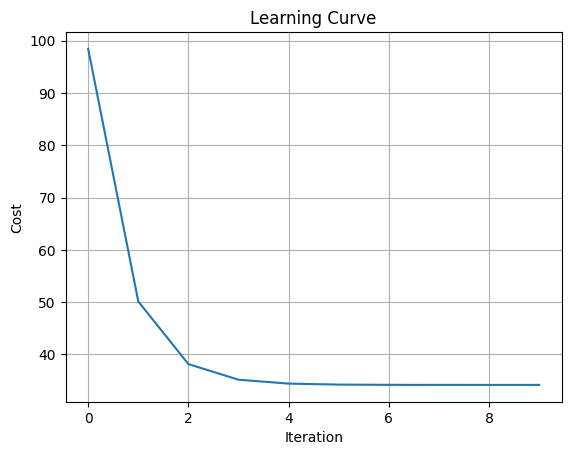

In [40]:
w_init = np.zeros(X_orig.shape[1])
b_init = 0
alpha = 0.5
iterations = 10

w_final, b_final, J_hist = gradient_descent(z_score_standardization(X_orig), y, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.grid(True)
plt.show()